In [1]:
import rasterio 
import rasterio.plot
from rasterio.plot import show
import pandas as pd
import matplotlib.pyplot as plt

## 1. Ouverture du fichier + visualisation

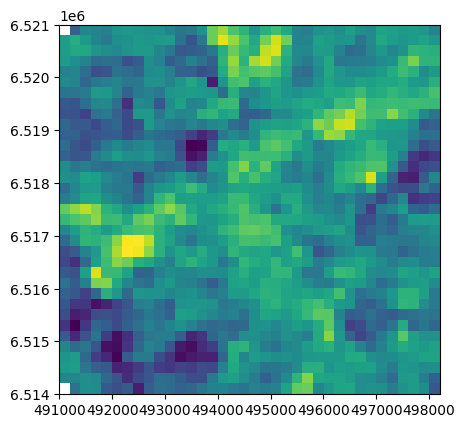

<Axes: >

In [2]:
data = "../assets/Charleroi_geotif.tif"
tiff = rasterio.open(data)
show(tiff)


## 2. Transformation du fichier en csv avec les centroids (lat/lon/valeur)

In [3]:
import rasterio
import numpy as np
from rasterio.features import shapes
import geopandas as gpd
# Load the GeoTiff
with rasterio.open('../assets/Charleroi_geotif.tif') as src:
    # Convert the first band to float32
    image = src.read(1).astype(np.float32)
    # Extract shapes and values
    results = (
        {'properties': {'raster_value': v}, 'geometry': s}
        for i, (s, v) in enumerate(shapes(image, transform=src.transform))
    )
# Convert the results to a GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(results)
# Explicitly set the CRS of the GeoDataFrame to the original CRS
gdf.crs = "EPSG:3857"
# Convert the GeoDataFrame to latitude/longitude
gdf = gdf.to_crs("EPSG:4326")
# Compute the centroids of the polygons
centroids = gdf.geometry.centroid
# Add the centroids as new columns in the GeoDataFrame
gdf['centroid_lon'] = centroids.x
gdf['centroid_lat'] = centroids.y
# Select the columns to include in the CSV
csv_data = gdf[['centroid_lon', 'centroid_lat', 'raster_value']]
# Save the data to a CSV file
csv_data.to_csv('../assets/exemple.csv', index=False)

C:\Users\Décrypte\AppData\Local\Temp\ipykernel_23176\3698820260.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.geometry.centroid


## 3. Transformation en geojson (pas utilisé dans notre cas mais utiles)

In [4]:
import rasterio
import numpy as np
from rasterio.features import shapes
import geopandas as gpd
import json

# Load the GeoTiff
with rasterio.open('../assets/Charleroi_geotif.tif') as src:
    # Convert the first band to float32
    image = src.read(1).astype(np.float32)
    # Extract shapes and values
    results = (
        {'properties': {'raster_value': v}, 'geometry': s}
        for i, (s, v) in enumerate(shapes(image, transform=src.transform))
    )
# Convert the results to a GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(results)
# Convert the GeoDataFrame to GeoJSON
geojson = gdf.to_json()
# Save the GeoJSON to a file
with open("../assets/exemple.geojson", "w") as f:
    f.write(json.dumps(json.loads(geojson), indent=4))